In [78]:
import numpy as np
import pandas as pd
import math
from math import sin, cos, radians

import os
import matplotlib.pyplot as plt
import datetime

import scipy.stats as st
import scipy.signal as sgl
pd.set_option('display.max_columns', 500)

#import fastdtw
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

import scipy.interpolate as spi

#hide warning
import warnings
warnings.filterwarnings('ignore')

In [79]:
# file_name='./signature_data_preprocessed/U'+str(i)+'S'+str(j)+'.txt'
prefix = "./dataset/test/"
# file_name = prefix + 'report/new.sig'
file_name = prefix + 'bastian/2020929162526.sig'
file=pd.read_csv(file_name,delimiter=' ', names=['X','Y','TStamp','Pres','EndPts'], header=None, skiprows=2)
file_size=len(file)

# file2_name = 'signaturecontent_08191708.sig'
file2_name = prefix + 'dahval/202097143015.sig'
file2=pd.read_csv(file2_name,delimiter=' ', names=['X','Y','TStamp','Pres','EndPts'], header=None, skiprows=2)
file2_size=len(file2)

# file3_name = prefix + '2020720125531.sig'
# file3_name = prefix + 'bastian/2020929162526.sig'
file3_name = prefix + 'bastian/2020929162534.sig'
file3=pd.read_csv(file3_name,delimiter=' ', names=['X','Y','TStamp','Pres','EndPts'], header=None, skiprows=2)
file3_size=len(file3)

file_fake_name = prefix + 'bastian/forgery/verify_2020929164753.sig'
file_fake=pd.read_csv(file_fake_name,delimiter=' ', names=['X','Y','TStamp','Pres','EndPts'], header=None, skiprows=2)
file_fake_size=len(file_fake)


file_sigpad_name = prefix + 'sigpad.sig'
file_sigpad=pd.read_csv(file_sigpad_name,delimiter=' ', names=['X','Y','TStamp','Pres','EndPts'], header=None)
file_sigpad_size=len(file_sigpad)

In [80]:
startTime = file['TStamp'][0]
file['TStamp2'] = (file['TStamp'] - startTime) #ms

startTime = file3['TStamp'][0]
file3['TStamp2'] = (file3['TStamp'] - startTime) #ms
#数据对比来说，点数相对网上例子，少一半，也不算太差。

startTime = file_fake['TStamp'][0]
file_fake['TStamp2'] = (file_fake['TStamp'] - startTime) #ms

startTime = file_sigpad['TStamp'][0]
file_sigpad['TStamp2'] = (file_sigpad['TStamp'] - startTime) #ms

# file3

In [81]:
startTime = file2['TStamp'][0]
file2['TStamp2'] = (file2['TStamp'] - startTime) #ms

In [82]:
startTime = file3['TStamp'][0]
file3['TStamp2'] = (file3['TStamp'] - startTime) #ms

In [83]:
# # 写报告用的 注释掉 比较去掉重复点的变化
# fig = plt.figure(figsize=[8, 4])
# # plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='g')
# plt.scatter( file3['X'], file3['Y'],marker='o',c='', edgecolors='r')

# file3_after = remove_duplicated_point(file3)
# plt.scatter( file3_after['X'], file3_after['Y'],marker='o',c='', edgecolors='g')

# ax = plt.gca()                                 #获取到当前坐标轴信息
# ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
# ax.invert_yaxis()                            #反转Y坐标轴
# plt.show()

# # print(file3)
# # print(len(file3))

In [84]:
# file3_after = remove_duplicated_point(file3)

# fig = plt.figure(figsize=[8, 4])
# # plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='g')
# plt.scatter( file3['X'], file3['Y'],marker='o',c='', edgecolors='r')

# ax = plt.gca()                                 #获取到当前坐标轴信息
# ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
# ax.invert_yaxis()                            #反转Y坐标轴
# plt.show()
# print(len(file3))

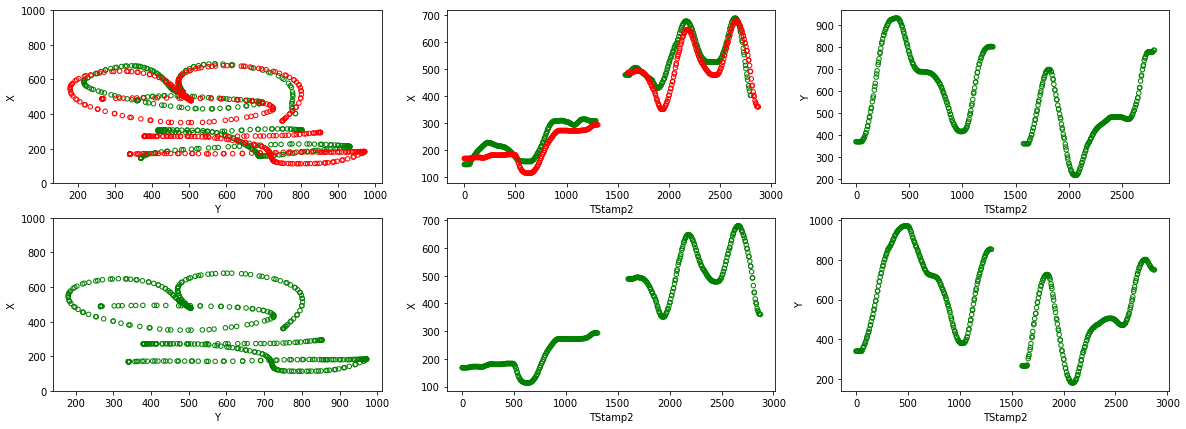

In [85]:
fig = plt.figure(figsize=[20,7])

#整理前的两张图片对比
ax1 = fig.add_subplot(2, 3, 1)
file.plot.scatter(x = "Y", y = "X", ax=ax1, marker='o',c='', edgecolors='g', ylim = (0, 1000))
file3.plot.scatter(x = "Y", y = "X", ax=ax1, marker='o',c='', edgecolors='r', ylim = (0, 1000))
ax2 = fig.add_subplot(2, 3, 2)
file.plot.scatter(x='TStamp2', y='X', ax=ax2, marker='o',c='', edgecolors='g')
file3.plot.scatter(x = "TStamp2", y = "X", ax=ax2, marker='o',c='', edgecolors='r')

ax3 = plt.subplot(2, 3, 3)
file.plot.scatter(x='TStamp2', y='Y', ax=ax3, marker='o',c='', edgecolors='g')

ax4 = fig.add_subplot(2, 3, 4)
file3.plot.scatter(x = "Y", y = "X", ax=ax4, marker='o',c='', edgecolors='g',  ylim = (0, 1000))
ax5 = fig.add_subplot(2, 3, 5)
file3.plot.scatter(x='TStamp2', y='X', ax=ax5, marker='o',c='', edgecolors='g')
ax6 = plt.subplot(2, 3, 6)
file3.plot.scatter(x='TStamp2', y='Y', ax=ax6, marker='o',c='', edgecolors='g')
#可以清晰的发现，扫描的点不够，不能完整反映图片

<Figure size 1440x2160 with 0 Axes>

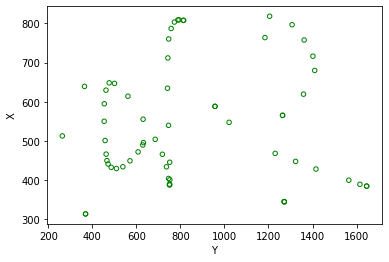

In [86]:
fig = plt.figure(figsize=[20, 30])
file_sigpad.plot.scatter(x='Y', y='X', marker='o',c='', edgecolors='g')

<Figure size 1440x2160 with 0 Axes>

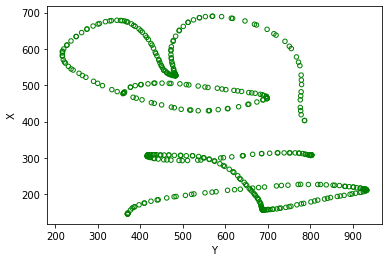

In [87]:
fig = plt.figure(figsize=[20, 30])
file.plot.scatter(x='Y', y='X', marker='o',c='', edgecolors='g')

In [88]:
# ##Preprocessing
# P=[]
# V=[]
# SDX=[]
# SDY=[]
# fileP = file3

# file_size=len(fileP)
# X=fileP['X']
# Y=fileP['Y']
# TS=fileP['TStamp2']
# BS=fileP['EndPts']
# # AZ=file['AZ']
# # AL=file['AL']
# # P=file['P']
# aX=sum(X)/file_size
# aY=sum(Y)/file_size
# for k in range(0,file_size-1):
#     if TS[k]==TS[k+1]:
#         X[k+1]=(X[k]+X[k+1])/2
#         Y[k+1]=(Y[k]+Y[k+1])/2
#         TS[k+1]=(TS[k]+1)
#         BS[k+1]=(BS[k]+BS[k+1])/2
# #         AZ[k+1]=(AZ[k]+AZ[k+1])/2
# #         AL[k+1]=(AL[k]+AL[k+1])/2
# #         P[k+1]=(P[k]+P[k+1])/2
#     if k<file_size-1:
#         V.append(((math.sqrt((X[k+1]-X[k])**2+(Y[k+1]-Y[k])**2))*(TS[file_size-1]-TS[0]))/(TS[k+1]-TS[k]))
#     SDX.append((X[k]-aX)**2)
#     SDY.append((Y[k]-aY)**2)
# SDX.append((X[file_size-1]-aX)**2)
# SDY.append((Y[file_size-1]-aY)**2)
# V.append(0)


# # data={'X':X,'Y':Y,'TS':TS,'BS':BS,'AZ':AZ,'AL':AL,'P':P,'V':V,'SDX':SDX,'SDY':SDY}
# data={'X':X,'Y':Y,'TStamp2':TS,'EndPts':BS,'P':P,'V':V,'SDX':SDX,'SDY':SDY}

In [89]:
# fig = plt.figure(figsize=[6,4])
# # plt.scatter(x = data["Y"], y = data["V"], marker='o',c='', edgecolors='g')
# plt.scatter(x = list(range(0,len(file3), 1)), y = data["V"], marker='o',c='', edgecolors='g')

# # plt.bar(list(range(0,len(data1), 1)), data['V'])
# # print(data)

<Figure size 1440x2160 with 0 Axes>

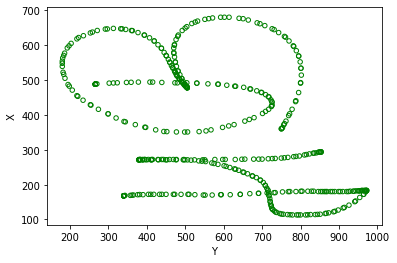

In [90]:
fig = plt.figure(figsize=[20, 30])
file3.plot.scatter(x='Y', y='X', marker='o',c='', edgecolors='g')

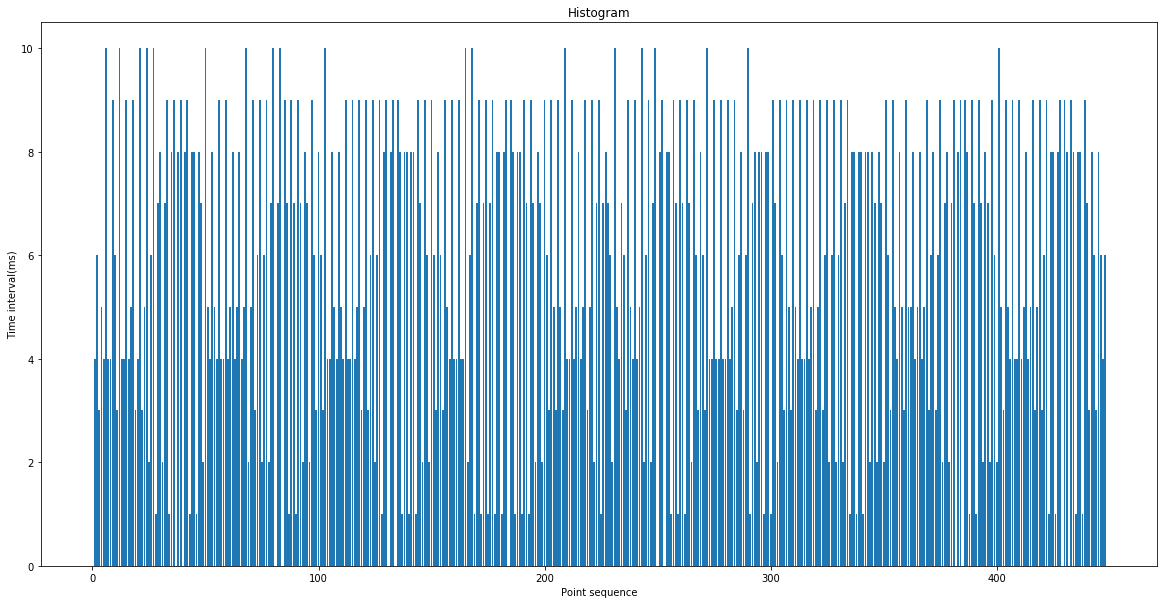

In [91]:
intervals = []
for index, row in file3.iterrows():
    if index == 0:
        intervals.append(0)
        continue
#     print(file['TStamp2'][index-1])
    interval = file3['TStamp2'][index]-file3['TStamp2'][index-1]
    if interval > 200:
        continue
    intervals.append(interval)    
# intervals = np.array(intervals)


fig = plt.figure(figsize=[20, 10])
plt.bar(range(len(intervals)), intervals)

# 显示横轴标签
plt.xlabel("Point sequence")
# 显示纵轴标签
plt.ylabel("Time interval(ms)")
# 显示图标题
plt.title("Histogram")
fig.show() # it is clearly shown that the intervals art not the same.

In [92]:
def remove_duplicated_point(df):
    df_new = df.drop(index=df.index)    
    old_x = df['X'][0]
    old_y = df['Y'][0]
    for index, row in df.iterrows():
        if row['X'] != old_x or row['Y']!=old_y or index == 0:
            df_new.loc[len(df_new)] = {'X': row['X'], 'Y': row['Y'], 'TStamp': row['TStamp'], 'Pres': row['Pres'], 'EndPts': row['EndPts'],
                                       'TStamp2': row['TStamp2']}
            old_x = row['X']
            old_y = row['Y']
        # update the EndPts if the point is   
        elif row['X'] == old_x and row['Y'] == old_y and row['EndPts'] == 1:
            df_new.iloc[len(df_new)-1]['EndPts']  = 1
    return df_new

In [93]:
# """
# The Ramer-Douglas-Peucker algorithm roughly ported from the pseudo-code provided
# by http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm
# """

# from math import sqrt

# def distance(a, b):
#     return  sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# def point_line_distance(point, start, end):
#     if (start == end):
#         return distance(point, start)
#     else:
#         n = abs(
#             (end[0] - start[0]) * (start[1] - point[1]) - (start[0] - point[0]) * (end[1] - start[1])
#         )
#         d = sqrt(
#             (end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2
#         )
#         return n / d

# def rdp(points, epsilon):
#     """
#     Reduces a series of points to a simplified version that loses detail, but
#     maintains the general shape of the series.
#     """
#     dmax = 0.0
#     index = 0
#     for i in range(1, len(points) - 1):
#         d = point_line_distance(points[i], points[0], points[-1])
#         if d > dmax:
#             index = i
#             dmax = d
#     if dmax >= epsilon:
#         results = rdp(points[:index+1], epsilon)[:-1] + rdp(points[index:], epsilon)
#     else:
#         results = [points[0], points[-1]]
#     return results


# def rdp_precoss(df):
#     l = []
#     for i in range(0, df.shape[0]):
#         l.append((df.loc[i, 'X'], df.loc[i, 'Y'],  df.loc[i, 'TStamp'], df.loc[i, 'Pres'], df.loc[i, 'EndPts'],  df.loc[i, 'TStamp2'] ))

#     final = rdp(l, 0.000000001)
#     df = pd.DataFrame(final, columns=['X', 'Y', 'TStamp', 'Pres', 'EndPts', 'TStamp2'])        
#     return df

In [94]:
"""
    add new features to signals
"""

def addSigFeature(df):
    dX = derivation(df['X'].tolist())     # dx
    dY = derivation(df['Y'].tolist())     # dy
#     df['dX'] = dX
#     df['dY'] = dY
    Vel = np.zeros(len(df)).tolist()   # velocity
    Angle = np.zeros(len(df)) # angle
    
    
    T = len(df) -1
    t = 1
    while t<= T:
        Vel[t] = math.sqrt(dX[t] * dX[t] + dY[t] * dY[t])
        if dY[t] != 0 and dX[t] != 0:
            Angle[t] = math.atan(dY[t] / dX[t])
        elif dX[t] == 0:
            Angle[t] = math.atan(dY[t] / 0.01)
        else:
            Angle[t] = 0
        t += 1    
    dAngle = derivation(Angle)
    dVel = derivation(Vel)
    Logcr = np.zeros(len(df)).tolist() 
    Tam = np.zeros(len(df)).tolist() #加速度
    
    t = 1
    while t<= T:
        Logcr[t] = math.log((abs(Vel[t]) + 0.01) / ((abs(dAngle[t]) + 0.01))) ;
        Tam[t] = math.sqrt(dVel[t] * dVel[t] + Vel[t] * Vel[t] * dAngle[t] * dAngle[t]) ;
        t += 1
        
        
#     print(Angle)    
    df['Angle'] = Angle
    df['Vel'] = Vel
    df['Logcr'] = Logcr
    df['Tam'] = Tam
    return df
    
    
# calculate the difference of the discrete sequence    
def derivation(signal):
    T = len(signal)-1
    dsignal = np.zeros(len(signal)).tolist()
    dsignal[0] = (2*signal[2] + signal[1] - 3*signal[0]) / 5
    dsignal[1] = (2*signal[3] + signal[2] - 2*signal[1] - signal[0]) / 6
    t= 2
    while t<=T-2:
        dsignal[t] = (2*signal[t+2] + signal[t+1] - signal[t-1] - 2*signal[t-2]) / 10 
#         print(dsignal[t])        
        t += 1
        # (2(Xn+2)+(Xn+1)-(Xn-1)-2(Xn-2))/10 == [2(Xn+2)-2(Xn+1)+3(Xn+1)-3(Xn)+3(Xn)-3(Xn-1)+2(Xn-1)-2(Xn-2)]/10
        
    dsignal[T-1] = (signal[T] - signal[T-2] + 2*signal[T-1] - 2*signal[T-3]) / 6 
    dsignal[T] = (3*signal[T] - signal[T-1] - 2*signal[T-2]) / 5 
    return dsignal

437


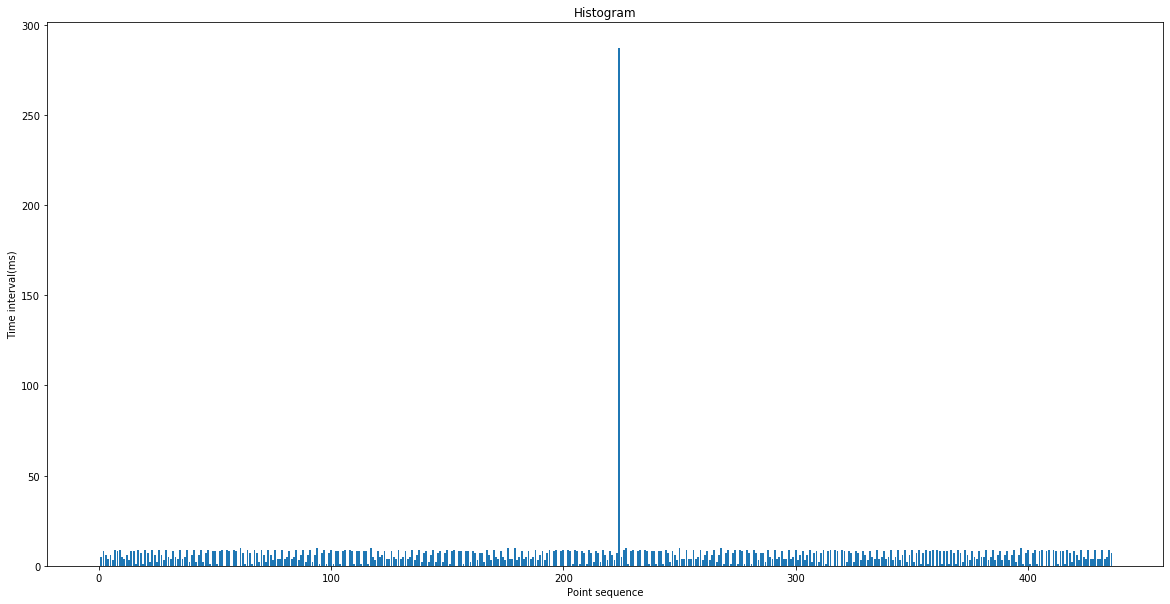

In [95]:
intervals = []
for index, row in file.iterrows():
    if index == 0:
        intervals.append(0)
        continue
#     print(file['TStamp2'][index-1])
    interval = file['TStamp2'][index]-file['TStamp2'][index-1]
    if interval > 300:
        continue
    intervals.append(interval)    
# intervals = np.array(intervals)

print(len(intervals))
fig = plt.figure(figsize=[20, 10])
plt.bar(range(len(intervals)), intervals)

# 显示横轴标签
plt.xlabel("Point sequence")
# 显示纵轴标签
plt.ylabel("Time interval(ms)")
# 显示图标题
plt.title("Histogram")
fig.show() # it is clearly shown that the intervals art not the same

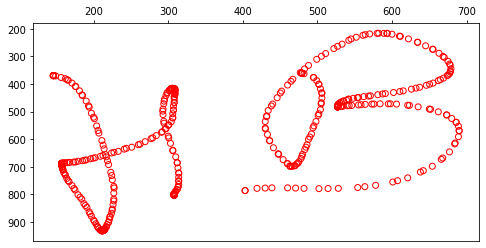

In [96]:
# Cubic-Spline to add points in stroke and make the curves smooth
def interpolate_points(df):
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

    df_new = df.loc[df["EndPts"] == 1]
    # 按手指离开屏幕的点，分笔触差值，因为在笔触间差值没有意义
    # 寻找断点
    EndPts = [0]
    EndPts.extend(list(df_new.index))
    EndPts_len = len(EndPts)
    if EndPts_len < 2:
        EndPts.append(len(df)-2) #如果没有就设最后一个点为离开屏幕的点
        EndPts_len += 1
    print(EndPts)        
    i = 0
    
    new_x_all = []
    iy3_x_all = []
    iy3_y_all = []
    while i < EndPts_len - 1:
        #data preparation
        start = EndPts[i]
        end = EndPts[i+1] + 1
        if start == 0:
            X= np.array(df['TStamp2'][0:end].tolist())
            Y= np.array(df['X'][0:end].tolist())
            Y2= np.array(df['Y'][0:end].tolist())
            if df['TStamp2'][start+1:end].max() - df['TStamp2'][start+1:end].min() <=15 or end - start <= 6:
                i+=1
                continue            
            new_x=np.arange(0,df['TStamp2'][0:end].max(),7) #define interpolate points
        else:            
            X= np.array(df['TStamp2'][start+1:end].tolist())
            Y= np.array(df['X'][start+1:end].tolist())
            Y2= np.array(df['Y'][start+1:end].tolist())
            if df['TStamp2'][start+1:end].max() - df['TStamp2'][start+1:end].min() <=15 or end - start <= 6:
                i+=1
                continue            
            new_x=np.arange(df['TStamp2'][start+1:end].min(),df['TStamp2'][start+1:end].max(),7) #define interpolate points            

    #     #进行一阶样条插值
    #     ipo1=spi.splrep(X,Y,k=1,s=10) #样本点导入，生成参数
    #     iy1=spi.splev(new_x,ipo1) #根据观测点和样条参数，生成插值

        #进行三次样条拟合
        ipo3=spi.splrep(X,Y,k=3, s=1000) #样本点导入，生成参数
        iy3=spi.splev(new_x,ipo3) #根据观测点和样条参数，生成插值
        ipo3_y=spi.splrep(X,Y2,k=3, s=1000) #样本点导入，生成参数
        iy3_y=spi.splev(new_x,ipo3_y) #根据观测点和样条参数，生成插值        
        new_x_all.extend(new_x)
        iy3_x_all.extend(iy3)
        iy3_y_all.extend(iy3_y)
        i += 1

    print(len(iy3_x_all))    
    X_all= np.array(df['TStamp2'].tolist())
    Y_all = np.array(df['X'].tolist())
    Y2_all = np.array(df['Y'].tolist())
    
    ##作图
    fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,12))

    ax1.plot(X_all,Y2_all,'o',label='样本点')
    ax1.plot(new_x_all,iy3_y_all,'*-',label='插值点')
    ax1.set_ylim(Y2_all.min()-20,Y2_all.max()+20)
    ax1.set_ylabel('Y坐标')
    ax1.set_title('Y三次线性插值')
    ax1.legend()

    ax2.plot(X_all,Y_all,'o',label='样本点')
    ax2.plot(new_x_all,iy3_x_all,'*-',label='插值点')
    ax2.set_ylim(Y_all.min()-20,Y_all.max()+20)
    ax2.set_ylabel('X坐标')
    ax2.set_title('X三次样条插值')
    ax2.legend()    
    fig.show()
    
#     df_new = df.loc[df["EndPts"] == 1]
#     result = pd.concat(frames)
#     df_new.index = range(len(df_new.index))
    df_new2 = df.drop(index=df.index)
    for i, val in enumerate(new_x_all):
#         if val in df['TStamp2'].tolist():
#             continue
#         if val in df['TStamp2'].tolist():
#             continue
        df_new2.loc[len(df_new2)] = {'X': iy3_x_all[i], 'Y': iy3_y_all[i], 'TStamp': 0, 'Pres': 0, 'EndPts': 0,'TStamp2': val}
    
    df_new = pd.concat([df_new, df_new2])
    df_new = df_new.sort_values(by=['TStamp2'])
    df_new.index = range(len(df_new.index))
#     print(df_new)
    return df_new
#     return df
#     df_new = remove_duplicated_point(df_new)
    
#     fig = plt.figure(figsize=[10,6])
#     plt.plot( df_new['TStamp2'], df_new["X"],'c*-')
#     fig.show()
#     fig = plt.figure(figsize=[10,6])
#     plt.plot( df['TStamp2'], df["X"],'c*-')
#     fig.show()    


fig = plt.figure(figsize=[8, 4])
# plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='g')
plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='r')

ax = plt.gca()                                 #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                            #反转Y坐标轴
plt.show()

file = remove_duplicated_point(file) # use RDP algorithm to remove duplicated points
file3 = remove_duplicated_point(file3) # use RDP algorithm to remove duplicated points
file_fake = remove_duplicated_point(file_fake) # use RDP algorithm to remove duplicated points

# file = rdp_precoss(file) # use RDP algorithm to remove duplicated points
# file3 = rdp_precoss(file3) # use RDP algorithm to remove duplicated points
# file_fake = rdp_precoss(file_fake) # use RDP algorithm to remove duplicated points


file = addSigFeature(file) 
file3 = addSigFeature(file3) 
file_fake = addSigFeature(file_fake) 

# file = interpolate_points(file)
# file3 = interpolate_points(file3)
# file_fake = interpolate_points(file_fake)




In [97]:
 from decimal import Decimal
def get_gravity_point(points):
    """
    @brief      获取多边形的重心点
    @param      points  The points
    @return     The center of gravity point.
    """
    if len(points) <= 2:
        return list()

    area = Decimal(0.0)
    x, y = Decimal(0.0), Decimal(0.0)
    for i in range(len(points)):
        lng = Decimal(points[i][0].item())
        lat = Decimal(points[i][1].item())
        nextlng = Decimal(points[i-1][0].item())
        nextlat = Decimal(points[i-1][1].item())

        tmp_area = (nextlng*lat - nextlat*lng)/Decimal(2.0)
        area += tmp_area
        x += tmp_area*(lng+nextlng)/Decimal(3.0)
        y += tmp_area*(lat+nextlat)/Decimal(3.0)
    x = x/area
    y = y/area
    return [float(x), float(y)]

In [98]:
# 求两直线夹角
def get_angle_betw_lines(x1, y1, x2, y2, x3, y3, x4, y4):
    k1 = (y2-y1)/(float(x2-x1))
    k2 = (y4-y3)/(float(x4-x3))
    Cobb = math.fabs(np.arctan((k1-k2)/(float(1 + k1*k2)))*180/np.pi)+0.5
    return Cobb

def get_grivity_angle(P):
    points_left = []
    points_right = []
    for point in P.exterior.coords:
        if point[0] <= P.centroid.x:
            points_left.append([point[0], point[1]])
        else:
            points_right.append([point[0], point[1]])

    P_left = Polygon(points_left)
    P_right = Polygon(points_right)        


#     print( P_left.centroid)
    theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,      
                                 0,0, 10,0)   
    return theta



#rotate for Polygon
def rotate_polygon(polygon, angle, center_point=(0, 0)):
    """Rotates the given polygon which consists of corners represented as (x,y)
    around center_point (origin by default)
    Rotation is counter-clockwise
    Angle is in degrees
    """
    rotated_polygon = []
    for corner in polygon.exterior.coords:
        rotated_corner = rotate_point(corner, angle, center_point)
        rotated_polygon.append(rotated_corner)
    rotated_polygon = Polygon(rotated_polygon)    
    return rotated_polygon

def rotate_point(point, angle, center_point=(0, 0)):
    """Rotates a point around center_point(origin by default)
    Angle is in degrees.
    Rotation is counter-clockwise
    """
    angle_rad = radians(angle % 360)
    # Shift the point so that center_point becomes the origin
    new_point = (point[0] - center_point[0], point[1] - center_point[1])
    new_point = (new_point[0] * cos(angle_rad) - new_point[1] * sin(angle_rad),
                 new_point[0] * sin(angle_rad) + new_point[1] * cos(angle_rad))
    # Reverse the shifting we have done
    new_point = (new_point[0] + center_point[0], new_point[1] + center_point[1])
    return new_point



# gravity_x, gravity_y = gravity_normalize(file)
# print(gravity_x, gravity_y)

from shapely.geometry import Polygon

def rotate_graphic(file):
    points_left = []
    points_right = []
    points = []

    for index, row in file.iterrows():
        if  abs(row['X']) > 100000 or abs(row['Y']) > 100000:
            continue
        points.append([row['X'], row['Y']])

    
    
    P = Polygon(points)
    print(P.centroid)
    plt.figure()
    plt.plot(P.centroid.y,P.centroid.x,"rx") 
    plt.show() # if you need...    
    
    theta = get_grivity_angle(P)
    theta_old = theta
    print(theta)
    
    if theta >6 and get_grivity_angle(rotate_polygon(P, theta_old/24, (P.centroid.x, P.centroid.y))) < theta: 
        while theta > 6.0 :
#             print("here")
    #     if theta <= 90: # clock-wise 顺时针
            P = rotate_polygon(P, theta_old/24, (P.centroid.x, P.centroid.y))        
            theta = get_grivity_angle(P)
    elif  theta >6 and get_grivity_angle(rotate_polygon(P, -theta_old/24, (P.centroid.x, P.centroid.y))) < theta_old:
        while theta > 6.0 :
            P = rotate_polygon(P, -theta_old/24, (P.centroid.x, P.centroid.y))        
            theta = get_grivity_angle(P)          
            
    P_rotated = P
    P_rotated_points_x = []
    P_rotated_points_y = []
    for point in   P_rotated.exterior.coords:
        P_rotated_points_x.append(point[0])   
        P_rotated_points_y.append(point[1])   

    print(P_rotated.centroid)




    fig = plt.figure(figsize=[6,4])
    plt.scatter(x = file["Y"], y = file["X"], marker='o',c='', edgecolors='g')

#     plt.plot(gravity_y, gravity_x, 'rx')
#     plt.plot(P_left.centroid.y, P_left.centroid.x, 'rx')
#     plt.plot(P_right.centroid.y, P_right.centroid.x, 'rx')

    plt.scatter(x = P_rotated_points_y, y = P_rotated_points_x, marker='o',c='', edgecolors='b')

    points_left = []
    points_right = []
    for point in P_rotated.exterior.coords:
        if point[0] <= P_rotated.centroid.x:
            points_left.append([point[0], point[1]])
        else:
            points_right.append([point[0], point[1]])

    P_left = Polygon(points_left)
    P_right = Polygon(points_right)        
    plt.plot(P_left.centroid.y, P_left.centroid.x, 'bx')
    plt.plot(P_right.centroid.y, P_right.centroid.x, 'bx')
    

    theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,      
                                 0,0, 10,0)
    print(theta)
    fig.show()

    file['X'] = P_rotated_points_x[0:-1]
    file['Y'] = P_rotated_points_y[0:-1]
    return file

# file = rotate_graphic(file)
# file3 = rotate_graphic(file3)
# file_fake = rotate_graphic(file_fake)

In [99]:
# # 求两直线夹角
# def get_angle_betw_lines(x1, y1, x2, y2, x3, y3, x4, y4):
#     k1 = (y2-y1)/(float(x2-x1))
#     k2 = (y4-y3)/(float(x4-x3))
#     Cobb = math.fabs(np.arctan((k1-k2)/(float(1 + k1*k2)))*180/np.pi)+0.5
#     return Cobb


# def get_grivity_angle(P):
#     points_left = []
#     points_right = []
#     points_x = []
#     for point in   P.exterior.coords:
#         points_x.append(point[0])   
# #         points_y.append(point[1])
        
#     for point in P.exterior.coords:
#         if point[0] <= np.mean(points_x):
#             points_left.append([point[0], point[1]])
#         else:
#             points_right.append([point[0], point[1]])
      
#     left_xs, left_ys = zip(*points_left) #create lists of x and y values
#     left_xs = list(left_xs)
#     left_ys = list(left_ys)
#     right_xs, right_ys = zip(*points_right) #create lists of x and y values
#     right_xs = list(right_xs)
#     right_ys = list(right_ys)    
# #     print( P_left.centroid)
#     theta = get_angle_betw_lines( np.mean(left_xs),  np.mean(left_ys), np.mean(right_xs),  np.mean(right_xs),      
#                                  0,0, 10,0)   
#     return theta

# #rotate for Polygon
# def rotate_polygon(polygon, angle, center_point=(0, 0)):
#     """Rotates the given polygon which consists of corners represented as (x,y)
#     around center_point (origin by default)
#     Rotation is counter-clockwise
#     Angle is in degrees
#     """
#     rotated_polygon = []
#     for corner in polygon.exterior.coords:
#         rotated_corner = rotate_point(corner, angle, center_point)
#         rotated_polygon.append(rotated_corner)
#     rotated_polygon = Polygon(rotated_polygon)    
#     return rotated_polygon

# def rotate_point(point, angle, center_point=(0, 0)):
#     """Rotates a point around center_point(origin by default)
#     Angle is in degrees.
#     Rotation is counter-clockwise
#     """
#     angle_rad = radians(angle % 360)
#     # Shift the point so that center_point becomes the origin
#     new_point = (point[0] - center_point[0], point[1] - center_point[1])
#     new_point = (new_point[0] * cos(angle_rad) - new_point[1] * sin(angle_rad),
#                  new_point[0] * sin(angle_rad) + new_point[1] * cos(angle_rad))
#     # Reverse the shifting we have done
#     new_point = (new_point[0] + center_point[0], new_point[1] + center_point[1])
#     return new_point



# # gravity_x, gravity_y = gravity_normalize(file)
# # print(gravity_x, gravity_y)

# from shapely.geometry import Polygon

# def rotate_graphic(file):
#     points_left = []
#     points_right = []
#     points = []

#     for index, row in file.iterrows():
#         if  abs(row['X']) > 100000 or abs(row['Y']) > 100000:
#             continue
#         points.append([row['X'], row['Y']])

    
    
#     P = Polygon(points)
#     print(P.centroid)
#     xs, ys = zip(*points) #create lists of x and y values
#     xs = list(xs)
#     ys = list(ys)
#     print(max(xs),min(xs),max(ys),min(ys))
#     plt.figure()
#     plt.plot(ys,xs)  
#     plt.plot(np.mean(ys),np.mean(xs),"rx") 
    
#     plt.show() # if you need...
#     print(np.mean(xs),np.mean(ys))
    
    
#     theta = get_grivity_angle(P)
#     theta_old = theta    
    
#     print("theta_old:", theta_old)
#     if theta >6 and get_grivity_angle(rotate_polygon(P, theta_old/24, (np.mean(xs), np.mean(ys)))) < theta: 
#         while theta > 6.0 :
# #             print("here")
#     #     if theta <= 90: # clock-wise 顺时针
#             P = rotate_polygon(P, theta_old/24, (np.mean(xs), np.mean(ys)))        
#             theta = get_grivity_angle(P)
#             print(theta)
#     elif  theta >6 and get_grivity_angle(rotate_polygon(P, -theta_old/24, (np.mean(xs), np.mean(ys)))) < theta_old:
#         while theta > 6.0 :
#             P = rotate_polygon(P, -theta_old/24, (np.mean(xs), np.mean(ys)))        
#             theta = get_grivity_angle(P)          
            
#     P_rotated = P
#     P_rotated_points_x = []
#     P_rotated_points_y = []
#     for point in   P_rotated.exterior.coords:
#         P_rotated_points_x.append(point[0])   
#         P_rotated_points_y.append(point[1])   

#     print(P_rotated.centroid)
#     print(theta,"here")




#     fig = plt.figure(figsize=[6,4])
#     plt.scatter(x = file["Y"], y = file["X"], marker='o',c='', edgecolors='g')

# #     plt.plot(gravity_y, gravity_x, 'rx')
# #     plt.plot(P_left.centroid.y, P_left.centroid.x, 'rx')
# #     plt.plot(P_right.centroid.y, P_right.centroid.x, 'rx')

#     plt.scatter(x = P_rotated_points_y, y = P_rotated_points_x, marker='o',c='', edgecolors='b')

#     points_left = []
#     points_right = []
#     for point in P_rotated.exterior.coords:
#         if point[0] <= P_rotated.centroid.x:
#             points_left.append([point[0], point[1]])
#         else:
#             points_right.append([point[0], point[1]])

#     P_left = Polygon(points_left)
#     P_right = Polygon(points_right)

#     left_xs, left_ys = zip(*points_left) #create lists of x and y values
#     left_xs = list(left_xs)
#     left_ys = list(left_ys)
#     right_xs, right_ys = zip(*points_right) #create lists of x and y values
#     right_xs = list(right_xs)
#     right_ys = list(right_ys) 
    
#     plt.plot(np.mean(left_xs), np.mean(left_ys), 'rx')
#     plt.plot(np.mean(right_xs), np.mean(right_ys), 'rx')
    

# #     theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,      
# #                                  0,0, 10,0)
# #     print(theta)
#     fig.show()

# #     file['X'] = P_rotated_points_x[0:-1]
# #     file['Y'] = P_rotated_points_y[0:-1]
#     return file

# file = rotate_graphic(file)
# # file3 = rotate_graphic(file3)
# # file_fake = rotate_graphic(file_fake)

In [100]:
# add columns
file['normalX'] = file['X']
file['normalY'] = file['Y']
file3['normalX'] = file3['X']
file3['normalY'] = file3['Y']
file_fake['normalX'] = file_fake['X']
file_fake['normalY'] = file_fake['Y']

In [101]:
# Size normalization 大小规整
# position normalization 位置规整
def normalizeFile(normalInputFile):
    widthX = 500 #width
    heightY = 200 #height
    minX = normalInputFile['X'].min()
    minY = normalInputFile['Y'].min()
    maxX = normalInputFile['X'].max()
    maxY = normalInputFile['Y'].max()
    normalInputFile['normalX'] = widthX * ((normalInputFile['X'] - minX)/(maxX - minX))
    normalInputFile['normalY'] = heightY * ((normalInputFile['Y'] - minY)/(maxY - minY))
    
    #position normalization
    averX = normalInputFile['normalX'].mean()
    averY = normalInputFile['normalY'].mean()
#     averX = widthX / 2
#     averY = heightY / 2

    normalInputFile['normalX'] = normalInputFile['normalX'] - averX
    normalInputFile['normalY'] = normalInputFile['normalY'] - averY
    return normalInputFile

# # Gravity normalization 重心规整
# def  gravity_normalize(df):
#     points = []
#     for index, row in df.iterrows():
#         points.append([row['normalX'], row['normalY']])
    
#     return get_centerpoint(points)


# def get_centerpoint(lis):
#     area = 0.0
#     x,y = 0.0,0.0
 
#     a = len(lis)
#     for i in range(a):
#         lat = lis[i][0] #weidu
#         lng = lis[i][1] #jingdu
 
#         if i == 0:
#             lat1 = lis[-1][0]
#             lng1 = lis[-1][1]
 
#         else:
#             lat1 = lis[i-1][0]
#             lng1 = lis[i-1][1]
 
#         fg = (lat*lng1 - lng*lat1)/2.0
 
#         area += fg
#         x += fg*(lat+lat1)/3.0
#         y += fg*(lng+lng1)/3.0
 
#     x = x/area
#     y = y/area
 
#     return x,y

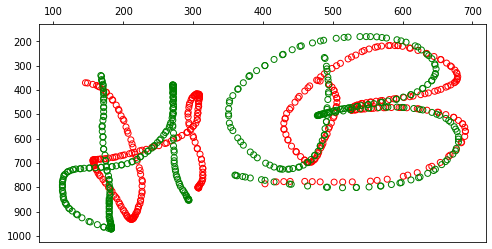

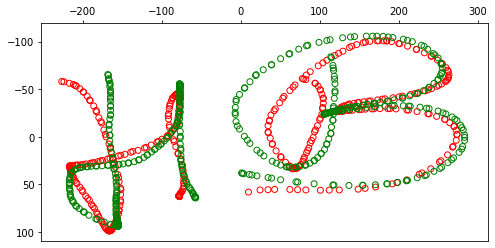

In [102]:

# 写报告用的。 对比normalization前后的样本的变化。可注释掉。
fig = plt.figure(figsize=[8, 4])
# plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='g')
plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='r')
plt.scatter( file3['X'], file3['Y'],marker='o',c='', edgecolors='g')


ax = plt.gca()                                 #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                            #反转Y坐标轴
# plt.show()

file_new = normalizeFile(file) # use RDP algorithm to remove duplicated points
file3_new = normalizeFile(file3) # use RDP algorithm to remove duplicated points


fig = plt.figure(figsize=[8, 4])
# plt.scatter( file['X'], file['Y'],marker='o',c='', edgecolors='g')
plt.scatter( file_new['normalX'], file_new['normalY'],marker='o',c='', edgecolors='r')
plt.scatter( file3_new['normalX'], file3_new['normalY'],marker='o',c='', edgecolors='g')


ax = plt.gca()                                 #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                            #反转Y坐标轴
plt.show()

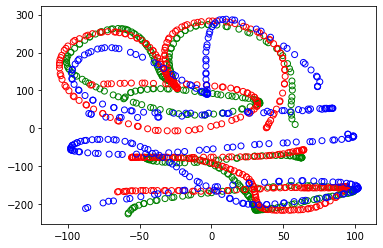

In [103]:
file = normalizeFile(file)
file3 = normalizeFile(file3)
file_fake = normalizeFile(file_fake)


#整理后的两张图片对比
fig = plt.figure(figsize=[6,4])
plt.scatter(x = file["normalY"], y = file["normalX"], marker='o',c='', edgecolors='g')
plt.scatter(x= file3['normalY'], y= file3['normalX'] , marker='o',c='', edgecolors='r')
plt.scatter(x= file_fake['normalY'], y= file_fake['normalX'] , marker='o',c='', edgecolors='b')


fig.show()


In [104]:
# # 求两直线夹角
# def get_angle_betw_lines(x1, y1, x2, y2, x3, y3, x4, y4):
#     k1 = (y2-y1)/(float(x2-x1))
#     k2 = (y4-y3)/(float(x4-x3))
#     Cobb = math.fabs(np.arctan((k1-k2)/(float(1 + k1*k2)))*180/np.pi)+0.5
#     return Cobb

# def get_grivity_angle(P):
#     points_left = []
#     points_right = []
#     for point in P.exterior.coords:
#         if point[0] <= P.centroid.x:
#             points_left.append([point[0], point[1]])
#         else:
#             points_right.append([point[0], point[1]])

#     P_left = Polygon(points_left)
#     P_right = Polygon(points_right)        
# #     plt.plot(P_left.centroid.y, P_left.centroid.x, 'bx')
# #     plt.plot(P_right.centroid.y, P_right.centroid.x, 'bx')

#     theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,      
#                                  0,0, 10,0)
#     return theta


# #rotate for Polygon
# def rotate_polygon(polygon, angle, center_point=(0, 0)):
#     """Rotates the given polygon which consists of corners represented as (x,y)
#     around center_point (origin by default)
#     Rotation is counter-clockwise
#     Angle is in degrees
#     """
#     rotated_polygon = []
#     for corner in polygon.exterior.coords:
#         rotated_corner = rotate_point(corner, angle, center_point)
#         rotated_polygon.append(rotated_corner)
#     rotated_polygon = Polygon(rotated_polygon)    
#     return rotated_polygon

# def rotate_point(point, angle, center_point=(0, 0)):
#     """Rotates a point around center_point(origin by default)
#     Angle is in degrees.
#     Rotation is counter-clockwise
#     """
#     angle_rad = radians(angle % 360)
#     # Shift the point so that center_point becomes the origin
#     new_point = (point[0] - center_point[0], point[1] - center_point[1])
#     new_point = (new_point[0] * cos(angle_rad) - new_point[1] * sin(angle_rad),
#                  new_point[0] * sin(angle_rad) + new_point[1] * cos(angle_rad))
#     # Reverse the shifting we have done
#     new_point = (new_point[0] + center_point[0], new_point[1] + center_point[1])
#     return new_point



# # gravity_x, gravity_y = gravity_normalize(file)
# # print(gravity_x, gravity_y)

# from shapely.geometry import Polygon

# def rotate_graphic(file):
#     points_left = []
#     points_right = []
#     points = []

#     for index, row in file.iterrows():
#         points.append([row['normalX'], row['normalY']])

#     P = Polygon(points)
#     print(P.centroid)


# #     for index, row in file.iterrows():
# #         if row['normalX'] <= P.centroid.x:
# #             points_left.append([row['normalX'], row['normalY']])
# #         else:
# #             points_right.append([row['normalX'], row['normalY']])

# #     P_left = Polygon(points_left)
# #     P_right = Polygon(points_right)
# #     #print(P_left.centroid, P_right.centroid)

# #     theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,           
# #                                  0,0, 10,0)
#     theta = get_grivity_angle(P)
#     theta_old = theta
#     print(theta)
    
    
#     if theta >6 and get_grivity_angle(rotate_polygon(P, theta_old/24, (P.centroid.x, P.centroid.y))) < theta: 
#         while theta > 6.0 :
# #             print("here")
#     #     if theta <= 90: # clock-wise 顺时针
#             P = rotate_polygon(P, theta_old/24, (P.centroid.x, P.centroid.y))        
#             theta = get_grivity_angle(P)
#     elif  theta >6 and get_grivity_angle(rotate_polygon(P, -theta_old/24, (P.centroid.x, P.centroid.y))) < theta_old:
#         while theta > 6.0 :
#             P = rotate_polygon(P, -theta_old/24, (P.centroid.x, P.centroid.y))        
#             theta = get_grivity_angle(P)          
            
#     P_rotated = P
#     P_rotated_points_x = []
#     P_rotated_points_y = []
#     for point in   P_rotated.exterior.coords:
#         P_rotated_points_x.append(point[0])   
#         P_rotated_points_y.append(point[1])   

#     print(P_rotated.centroid)




#     fig = plt.figure(figsize=[6,4])
#     plt.scatter(x = file["normalY"], y = file["normalX"], marker='o',c='', edgecolors='g')

# #     plt.plot(gravity_y, gravity_x, 'rx')
# #     plt.plot(P_left.centroid.y, P_left.centroid.x, 'rx')
# #     plt.plot(P_right.centroid.y, P_right.centroid.x, 'rx')

#     plt.scatter(x = P_rotated_points_y, y = P_rotated_points_x, marker='o',c='', edgecolors='b')

#     points_left = []
#     points_right = []
#     for point in P_rotated.exterior.coords:
#         if point[0] <= P_rotated.centroid.x:
#             points_left.append([point[0], point[1]])
#         else:
#             points_right.append([point[0], point[1]])

#     P_left = Polygon(points_left)
#     P_right = Polygon(points_right)        
#     plt.plot(P_left.centroid.y, P_left.centroid.x, 'bx')
#     plt.plot(P_right.centroid.y, P_right.centroid.x, 'bx')

#     theta = get_angle_betw_lines( P_left.centroid.x,  P_left.centroid.y,  P_right.centroid.x,  P_right.centroid.y,      
#                                  0,0, 10,0)
#     print(theta)
#     # plt.plot(gravity_x, gravity_y, 'bx')


#     fig.show()

#     file['normalX'] = P_rotated_points_x[0:-1]
#     file['normalY'] = P_rotated_points_y[0:-1]
#     return file

# file = rotate_graphic(file)
# file3 = rotate_graphic(file3)



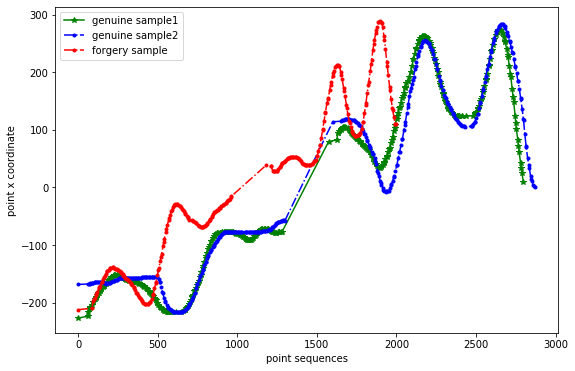

In [105]:
#the plot before length normalization
fig = plt.figure(figsize=[9,6])
l1 = plt.plot(file["TStamp2"], file["normalX"], 'g*-',label='genuine sample1')
l2 = plt.plot(file3['TStamp2'], file3['normalX'] , 'b.-.', label='genuine sample2')
l3 = plt.plot(file_fake['TStamp2'], file_fake['normalX'] , 'r.-.', label='forgery sample')

plt.xlabel('point sequences')
plt.ylabel('point x coordinate')

plt.legend()
# plt.legend(handles=[l1,l2,l3],labels=['sample1','sample2','sample3'],loc='best')


#we can see clearly, the length of two plots are not same

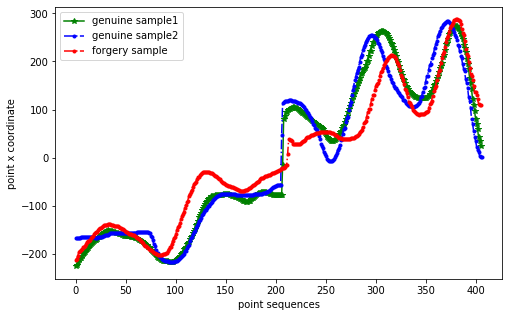

In [106]:
#长度归一化
def samelen(data,length=400):
#归一化标准长度为 400，若某一签名长度为 d，则需在此签名中每隔
#(d-1)/400 个坐标点提取一个数据， 所取得的数据根据前后两个点进行线性提取    
    data_size = len(data)
    interval = (data_size-1)/length
    start = 0
    new_data = data.drop(index=data.index)
    for dist in np.arange(start, data_size-1, interval):
        first = math.floor(dist)
        second = math.ceil(dist)
        if second >= data_size:
            second = data_size -1
        percent = (dist - first) / 1.0   
        #'X','Y','TStamp','Pres','EndPts'
#         print ((data.X[first] + data.X[second])/2)

#         X = (data.at[first,'X'] + data.at[second,'X']) / 2
#         Y = (data.Y[first] + data.Y[second])/2 
        TStamp = (data.TStamp[first] + data.TStamp[second])/2 
#         normalX = (data.normalX[first] + data.normalX[second])/2
#         normalY = (data.normalY[first] + data.normalY[second])/2 
#         TStamp2 = (data.TStamp2[first] + data.TStamp2[second])/2
        
        X = data.at[first,'X'] + (data.at[second,'X'] - data.at[first,'X']) * percent
        Y = data.at[first,'Y'] + (data.at[second,'Y'] - data.at[first,'Y']) * percent
        normalX = data.at[first,'normalX'] + (data.at[second,'normalX'] - data.at[first,'normalX']) * percent
        normalY = data.at[first,'normalY'] + (data.at[second,'normalY'] - data.at[first,'normalY']) * percent 
        TStamp2 = data.at[first,'TStamp2'] + (data.at[second,'TStamp2'] - data.at[first,'TStamp2']) * percent 
        Pres = data.at[first,'Pres'] + (data.at[second,'Pres'] - data.at[first,'Pres']) * percent 
        Angle = data.at[first,'Angle'] + (data.at[second,'Angle'] - data.at[first,'Angle']) * percent
        Vel = data.at[first,'Vel'] + (data.at[second,'Vel'] - data.at[first,'Vel']) * percent 
        Logcr = data.at[first,'Logcr'] + (data.at[second,'Logcr'] - data.at[first,'Logcr']) * percent 
        Tam = data.at[first,'Tam'] + (data.at[second,'Tam'] - data.at[first,'Tam']) * percent 
        
        if data.EndPts[first] == 1 or data.EndPts[second] == 1:
            EndPts = 1
        else:
            EndPts = 0
            
        new_data.loc[len(new_data)] = {'X': X, 'Y': Y, 'TStamp': TStamp, 'Pres': Pres, 'EndPts': EndPts,'normalX': normalX,
                         'normalY': normalY, 'TStamp2': TStamp2,'Angle': Angle,'Vel': Vel,'Logcr': Logcr,'Tam': Tam }
    return new_data

#         d = (data[first] + data[second])/2
#         new_data.loc[len(new_data)] = d

max_data_length = len(file)+10
# max_data_length = 789

data1 = file
data2 = file3
data3 = file_fake

data1 = samelen(file, max_data_length)
data2 = samelen(file3, max_data_length)
data3 = samelen(file_fake,max_data_length)



# print (data1)
# df = file        
# df=df.drop(index=df.index)
# file.loc[len(file)] = 3

# print (list(range(0,len(data1)-1, 1)))
#the plot after length normalization
fig = plt.figure(figsize=[8,5])
# plt.plot(data1["TStamp2"], data1["normalX"],'c*-', )
# plt.plot(data2['TStamp2'], data2['normalX'] , 'm.-.')
plt.plot( list(range(0,len(data1), 1)), data1["normalX"],'g*-', label='genuine sample1')
plt.plot( list(range(0,len(data2),1)), data2['normalX'] , 'b.-.', label='genuine sample2')
plt.plot( list(range(0,len(data3),1)), data3['normalX'] , 'r.-.', label='forgery sample')
plt.xlabel('point sequences')
plt.ylabel('point x coordinate')
plt.legend()

#we can see clearly, the length of two plots are same


3 3
[0, 207, 405]
[0, 206, 406]
[0, 212, 405]


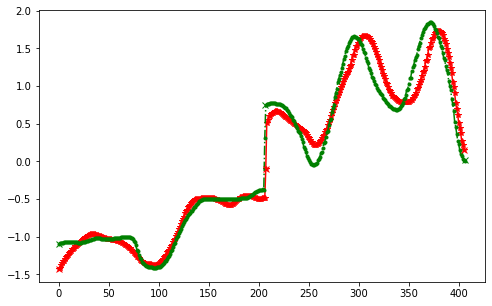

In [123]:
# def calc_extrme_points(data):
#     length=len(data)
#     data_extr_points ={}
#     data_extr_points['point'] = []
#     data_extr_points['value'] = []    
#     data_extr_points['type'] = []    
    
#     for i in range(5,length-5):
#         # local maximum point
#         local_list = list(range(i-5, i)) #如果之前5个点之内已经记录有点，则不记录
#         if data[i]>=data[i-1] and data[i]>=data[i-2] and data[i]>=data[i-3] and data[i]>=data[i-4] and data[i]>=data[i-5] and \
#         data[i]>=data[i+1] and data[i]>=data[i+2] and data[i]>=data[i+3] and data[i]>=data[i+4] and data[i]>=data[i+5] and \
#         len([j for j in local_list if j in data_extr_points['point'] ]) == 0:
#             data_extr_points['point'].append(i)
#             data_extr_points['value'].append(data[i])
#             data_extr_points['type'].append(1)
#             continue
            
#         # local minimum point            
#         if data[i]<=data[i-1] and data[i]<=data[i-2] and data[i]<=data[i-3] and data[i]<=data[i-4] and data[i]<=data[i-5] and \
#         data[i]<=data[i+1] and data[i]<=data[i+2] and data[i]<=data[i+3] and data[i]<=data[i+4] and data[i]<=data[i+5] and \
#         len([j for j in local_list if j in data_extr_points['point'] ]) == 0:
#             data_extr_points['point'].append(i)
#             data_extr_points['value'].append(data[i])
#             data_extr_points['type'].append(0)
        
#     #add start,end point
#     if data_extr_points['type'][0] == 0:
#         start_type = 1
#     else:
#         start_type = 0
#     data_extr_points['point'].insert(0, 0)
#     data_extr_points['value'].insert(0, data[0])
#     data_extr_points['type'].insert(0, start_type)

#     if data_extr_points['type'][-1] == 0:
#         end_type = 1
#     else:
#         end_type = 0
#     data_extr_points['point'].append(length-1)
#     data_extr_points['value'].append(data[length-1])
#     data_extr_points['type'].append(end_type)        
    
#     return data_extr_points


def calc_extrme_points(df):
    # 按手指离开屏幕的点，分笔触差值，因为在笔触间差值没有意义
    # 寻找断点
    EndPts = [0]
    EndPts.extend(list(df.loc[df["EndPts"] == 1].index))
    EndPts_len = len(EndPts)
#     print(EndPts)
    if EndPts_len < 2:
        EndPts.append(len(df)-1) #如果没有就设最后一个点为离开屏幕的点
        EndPts_len += 1
    i = 0
    EndPts2 = []
    while i < EndPts_len - 1:
        start = EndPts[i]
        end = EndPts[i+1]
        if end - start <= 6:
            i += 1            
            continue
        EndPts2.append(start)
        i += 1
        
    if EndPts[len(EndPts)-1] - EndPts2[len(EndPts2)-1] > 6:
        EndPts2.append(EndPts[len(EndPts)-1])
        
    re = {}
    re['point'] = EndPts2
    return re    

# data1_extr_points = calc_extrme_points(data1['normalX'].tolist())
# data2_extr_points = calc_extrme_points(data2['normalX'].tolist())
data1_extr_points = calc_extrme_points(data1)
data2_extr_points = calc_extrme_points(data2)
data3_extr_points = calc_extrme_points(data3)

print(len(data1_extr_points['point']), len(data2_extr_points['point']))
print(data1_extr_points['point'])
print(data2_extr_points['point'])
print(data3_extr_points['point'])
# data2_extr_points['point'] = [0, 249, 399]


fig = plt.figure(figsize=[8,5])
# print(data1.loc[data1["EndPts"] == 1.0].head())
# print(data1)

plt.plot( list(range(0,len(data1), 1)), data1["normalX"],'r*-')
plt.plot( list(range(0,len(data2),1)), data2['normalX'] , 'g.-.')
# plt.plot( list(range(0,len(data3),1)), data3['normalX'] , 'b.-.')
plt.plot( data1_extr_points['point'], data1["normalX"][data1_extr_points['point']],'rx')
plt.plot( data2_extr_points['point'], data2["normalX"][data1_extr_points['point']],'gx')
# plt.plot( data3_extr_points['point'], data3["normalX"][data1_extr_points['point']],'bx')

3 3
DTW distance by stroke:  395.3715932005941
3 3
DTW distance by stroke:  455.2917671451313


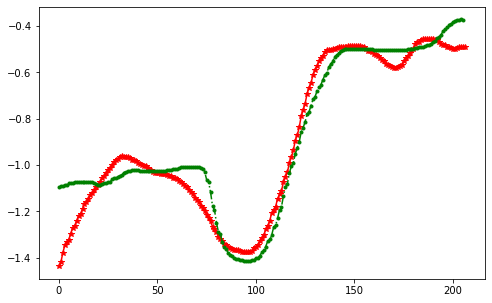

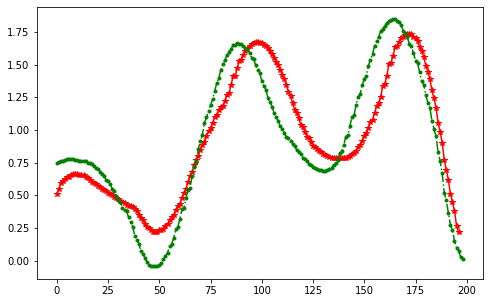

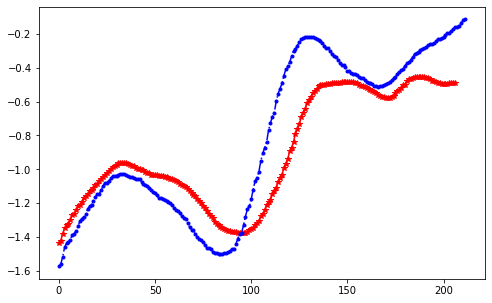

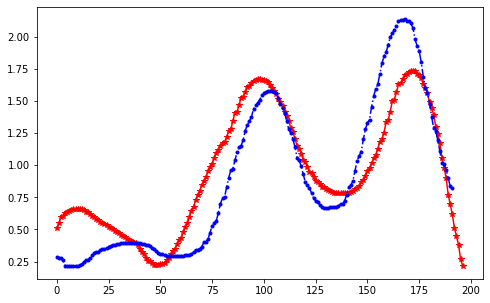

In [124]:
# calculate dtw distance by strokes

def get_stroke(df, extr_points, index):
    
    start = extr_points['point'][index]
    end = extr_points['point'][index+1]
    
    if index != 0:
        start += 1
    if index < len(extr_points['point']) - 1:
        end -= 1
    df_new = df.loc[start:end].copy()
#     print(df)
#     print(df_new)
#     df_new = normalizeFile(df_new)
    
    #set ts_a
    normalX = np.array(df_new['normalX'])
    normalY = np.array(df_new['normalY'])
#     Pres = np.array(df_new['Pres'])
    Angle = np.array(df_new['Angle'])
    Vel = np.array(df_new['Vel'])
    Logcr = np.array(df_new['Logcr'])
    Tam = np.array(df_new['Tam'])
    
    list(zip(normalX,normalY))
    ts_a = np.array(list(zip(normalX,normalY,Angle,Vel,Logcr,Tam)),dtype=float)
        
    return ts_a, df_new


total_distance = 0.0
print(len(data1_extr_points['point']), len(data2_extr_points['point']))
if len(data1_extr_points['point']) == len(data2_extr_points['point']):
    i = 0
    while i< len(data1_extr_points['point']) -1:
        ts_a, df_stroke1 = get_stroke(data1, data1_extr_points, i)
        ts_b, df_stroke2 = get_stroke(data2, data2_extr_points, i)

        fig = plt.figure(figsize=[8,5])
        # plt.plot(data1["TStamp2"], data1["normalX"],'c*-', )
        # plt.plot(data2['TStamp2'], data2['normalX'] , 'm.-.')
        plt.plot( list(range(0,len(df_stroke1),1)),df_stroke1["normalX"],'r*-')
        plt.plot( list(range(0,len(df_stroke2),1)),df_stroke2['normalX'],'g.-.')
        fig.show()
        distance, path = fastdtw(ts_a, ts_b, dist=euclidean)
        total_distance += distance
#         break
        i +=1
print("DTW distance by stroke: ", total_distance)

total_distance = 0.0
print(len(data1_extr_points['point']), len(data3_extr_points['point']))
if len(data1_extr_points['point']) == len(data3_extr_points['point']):
    i = 0
    while i< len(data1_extr_points['point']) -1:
        ts_a, df_stroke1 = get_stroke(data1, data1_extr_points, i)
        ts_b, df_stroke3 = get_stroke(data3, data3_extr_points, i)

        fig = plt.figure(figsize=[8,5])
        # plt.plot(data1["TStamp2"], data1["normalX"],'c*-', )
        # plt.plot(data2['TStamp2'], data2['normalX'] , 'm.-.')
        plt.plot( list(range(0,len(df_stroke1),1)),df_stroke1["normalX"],'r*-')
        plt.plot( list(range(0,len(df_stroke3),1)),df_stroke3['normalX'],'b.-.')
        fig.show()
        distance, path = fastdtw(ts_a, ts_b, dist=euclidean)
        total_distance += distance
#         break
        i +=1
print("DTW distance by stroke: ", total_distance)
        

genuine signature distance:  4852.767499022508
forgery signature distance:  12828.480470026569


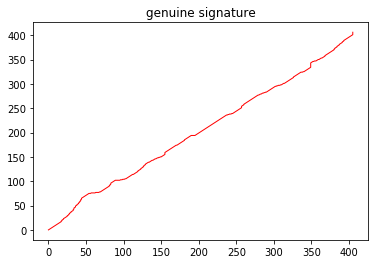

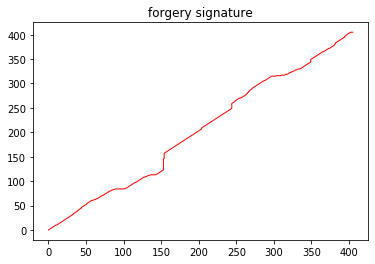

In [109]:
#set ts_a
normalX = np.array(data1['normalX'])
normalY = np.array(data1['normalY'])
list(zip(normalX,normalY))
ts_a = np.array(list(zip(normalX,normalY)),dtype=float)
# print(normalX)

#set ts_b
normalX = np.array(data2['normalX'])
normalY = np.array(data2['normalY'])
list(zip(normalX,normalY))
ts_b = np.array(list(zip(normalX,normalY)),dtype=float)

#set ts_c
normalX = np.array(data3['normalX'])
normalY = np.array(data3['normalY'])
list(zip(normalX,normalY))
ts_c = np.array(list(zip(normalX,normalY)),dtype=float)


#the plot of DTW distance for genuine signature
distance, path = fastdtw(ts_a, ts_b, dist=euclidean)
print("genuine signature distance: ", distance)
# print(path)
path = list(path)
xpath = []
ypath = []
for v in path:
    xpath.append(v[0])
    ypath.append(v[1])

fig = plt.figure(figsize=[6,4])
plt.plot(xpath, ypath, color="r",linewidth=1 )
plt.title("genuine signature")
fig.show()
#we can see clearly, the plot is smooth


#the plot of DTW distance for forgery signature
distance, path = fastdtw(ts_a, ts_c, dist=euclidean)
print("forgery signature distance: ", distance)
# print(path)
path = list(path)
xpath = []
ypath = []
for v in path:
    xpath.append(v[0])
    ypath.append(v[1])
fig = plt.figure(figsize=[6,4])
plt.plot(xpath, ypath,color="r",linewidth=1 )
plt.title("forgery signature")
fig.show()
#we can see clearly, the plot is not smooth


genuine signature distance:  400.9630737651461
forgery signature distance:  458.7496849505787


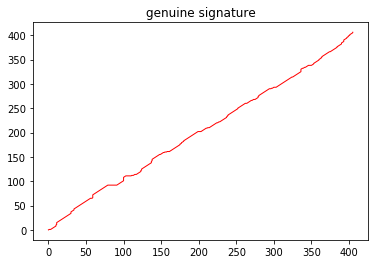

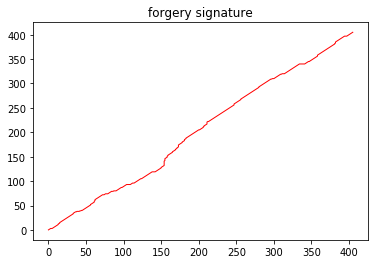

In [110]:
def normalization_df(df):
    
    EndPts = df['EndPts']
    TStamp = df['TStamp']
    normalized_df=(df-df.mean())/df.std()
    normalized_df['EndPts'] =EndPts
    normalized_df['TStamp'] =TStamp
#     normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

data1 = normalization_df(data1)
data2 = normalization_df(data2)
data3 = normalization_df(data3)

# print(data2['Vel'].tolist())
# print(max(data1['normalX'].tolist()))
#set ts_a
normalX = np.array(data1['normalX'])
normalY = np.array(data1['normalY'])
Pres = np.array(data1['Pres'])
Angle = np.array(data1['Angle'])
Vel = np.array(data1['Vel'])
Logcr = np.array(data1['Logcr'])
Tam = np.array(data1['Tam'])

list(zip(normalX,normalY))
ts_a = np.array(list(zip(normalX,normalY,Angle,Vel,Logcr,Tam)),dtype=float)
# ts_a = np.array(list(zip(normalX,normalY,)),dtype=float)

# print(normalX)

#set ts_b
normalX = np.array(data2['normalX'])
normalY = np.array(data2['normalY'])
Pres = np.array(data2['Pres'])
Angle = np.array(data2['Angle'])
Vel = np.array(data2['Vel'])
Logcr = np.array(data2['Logcr'])
Tam = np.array(data2['Tam'])
list(zip(normalX,normalY,Angle))
ts_b = np.array(list(zip(normalX,normalY,Angle,Vel,Logcr,Tam)),dtype=float)
# ts_b = np.array(list(zip(normalX,normalY,)),dtype=float)


#set ts_c
normalX = np.array(data3['normalX'])
normalY = np.array(data3['normalY'])
Pres = np.array(data3['Pres'])
Angle = np.array(data3['Angle'])
Vel = np.array(data3['Vel'])
Logcr = np.array(data3['Logcr'])
Tam = np.array(data3['Tam'])
list(zip(normalX,normalY))
ts_c = np.array(list(zip(normalX,normalY,Angle,Vel,Logcr,Tam)),dtype=float)
# ts_c = np.array(list(zip(normalX,normalY,)),dtype=float)


#the plot of DTW distance for genuine signature
distance, path = fastdtw(ts_a, ts_b, radius=6,dist=euclidean)
print("genuine signature distance: ", distance)
# print(path)
path = list(path)
xpath = []
ypath = []
for v in path:
    xpath.append(v[0])
    ypath.append(v[1])

fig = plt.figure(figsize=[6,4])
plt.plot(xpath, ypath, color="r",linewidth=1 )
plt.title("genuine signature")
fig.show()
#we can see clearly, the plot is smooth


# path = [(0,0),(1,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),(3, 12),(4, 13),(5, 14),(6, 14),(7, 14),(8, 14),(9, 14),(10, 14),(11, 14),(12, 14),(13, 14),(14, 14),(15, 14),(16, 14),(17, 15),(18, 16),(18, 17),(18, 18),(18, 19),(19, 20),(19, 21),(19, 22),(20, 23),(21, 24),(21, 25),(21, 26),(21, 27),(22, 28),(23, 29),(24, 30),(25, 31),(26, 31),(27, 31),(28, 32),(29, 33),(30, 33),(31, 33),(32, 33),(33, 33),(34, 34),(35, 35),(35, 36),(36, 37),(36, 38),(36, 39),(36, 40),(37, 41),(37, 42),(38, 43),(39, 44),(39, 45),(39, 46),(39, 47),(40, 48),(41, 49),(42, 49),(43, 49),(44, 49),(45, 49),(46, 49),(47, 49),(48, 49),(49, 49),(50, 49),(51, 50),(51, 51),(51, 52),(51, 53),(52, 54),(53, 55),(54, 56),(54, 57),(54, 58),(55, 59),(56, 60),(56, 61),(56, 62),(57, 63),(58, 64),(58, 65),(58, 66),(59, 67),(60, 68),(61, 69),(61, 70),(62, 71),(63, 72),(64, 73),(65, 74),(65, 75),(65, 76),(65, 77),(66, 78),(67, 79),(67, 80),(68, 81),(68, 82),(69, 83),(69, 84),(69, 85),(70, 86),(70, 87),(70, 88),(70, 89),(71, 90),(72, 91),(73, 91),(74, 91),(75, 91),(76, 91),(77, 91),(78, 91),(79, 91),(80, 91),(81, 92),(82, 93),(82, 94),(82, 95),(82, 96),(83, 97),(83, 98),(84, 99),(84, 100),(84, 101),(85, 102),(86, 103),(87, 104),(87, 105),(88, 106),(88, 107),(89, 108),(89, 109),(89, 110),(89, 111),(89, 112),(90, 113),(91, 114),(92, 115),(92, 116),(92, 117),(93, 118),(94, 119),(95, 120),(95, 121),(96, 122),(97, 122),(98, 123),(99, 124),(100, 125),(100, 126),(101, 127),(102, 128),(102, 129),(103, 130),(104, 131),(105, 131),(106, 131),(107, 131),(108, 132),(109, 133),(110, 134),(110, 135),(110, 136),(111, 137),(112, 138),(113, 139),(113, 140),(114, 141),(115, 142),(115, 143),(115, 144),(115, 145),(115, 146),(116, 147),(117, 148),(118, 149),(118, 150),(119, 151),(119, 152),(120, 153),(121, 154),(122, 154),(123, 154),(124, 154),(125, 155),(126, 156),(126, 157),(127, 158),(127, 159),(128, 160),(128, 161),(128, 162),(129, 163),(130, 164),(130, 165),(130, 166),(130, 167),(131, 168),(131, 169),(132, 170),(132, 171),(133, 172),(134, 173),(135, 174),(136, 175),(136, 176),(137, 177),(138, 178),(139, 179),(139, 180),(140, 181),(141, 182),(142, 183),(142, 184),(142, 185),(143, 186),(144, 187),(144, 188),(144, 189),(145, 190),(146, 191),(147, 191),(148, 191),(149, 191),(150, 191),(151, 191),(152, 192),(153, 193),(153, 194),(153, 195),(153, 196),(154, 197),(154, 198),(155, 199),(156, 200),(157, 201),(158, 202),(158, 203),(159, 204),(160, 205),(160, 206),(160, 207),(160, 208),(161, 209),(161, 210),(162, 211),(163, 212),(164, 213),(165, 214),(166, 215),(167, 215),(168, 215),(169, 215),(170, 215),(171, 215),(172, 216),(173, 217),(174, 218),(175, 219),(176, 220),(177, 220),(178, 220),(179, 220),(180, 220),(181, 220),(182, 220),(183, 220),(184, 220),(185, 220),(186, 220),(187, 220),(188, 220),(189, 220),(190, 220),(191, 221),(192, 222),(193, 223),(193, 224),(193, 225),(194, 226),(195, 226),(196, 226),(197, 226),(198, 226),(199, 226),(200, 226),(201, 227),(202, 228),(203, 229),(203, 230),(203, 231),(203, 232),(204, 233),(205, 234),(206, 234),(207, 234),(208, 234),(209, 234),(210, 234),(211, 234),(212, 234),(213, 234),(214, 234),(215, 234),(216, 234),(217, 234),(218, 234),(219, 235),(220, 235),(221, 235),(222, 235),(223, 235),(224, 235),(225, 235),(226, 235),(227, 235),(228, 235),(229, 235),(230, 235),(231, 235),(232, 235),(233, 236),(234, 236),(235, 237),(235, 238),(235, 239),(236, 240),(236, 241),(237, 242),(238, 243),(239, 244),(240, 245),(241, 246),(242, 246),(243, 246),(244, 246),(245, 246),(246, 246),(247, 247),(248, 248),(249, 249),(250, 250),(251, 251),(252, 252),(253, 253),(254, 254),(255, 255),(256, 256),(257, 257),(258, 258),(259, 259),(260, 260),(261, 261),(262, 262),(263, 263),(264, 264),(265, 265),(266, 266),(267, 267),(268, 268),(269, 269),(270, 270),(271, 271),(272, 272),(273, 273),(274, 274),(275, 275),(276, 276),(277, 276),(278, 276),(279, 276),(280, 276),(281, 276),(282, 276),(283, 276),(284, 276),(285, 276),(286, 276),(287, 276),(288, 276),(289, 276),(290, 276),(291, 277),(292, 278),(293, 278),(294, 279),(295, 280),(295, 281),(296, 282),(297, 283),(297, 284),(297, 285),(297, 286),(298, 287),(299, 288),(300, 289),(301, 290),(301, 291),(301, 292),(302, 293),(302, 294),(302, 295),(302, 296),(302, 297),(302, 298),(302, 299),(302, 300),(302, 301),(302, 302),(302, 303),(303, 304),(304, 305),(305, 306),(305, 307),(305, 308),(306, 309),(307, 310),(308, 311),(308, 312),(309, 313),(310, 314),(311, 314),(312, 314),(313, 315),(314, 316),(315, 317),(316, 318),(316, 319),(317, 320),(317, 321),(318, 322),(319, 323),(320, 324),(321, 324),(322, 325),(323, 326),(324, 327),(325, 328),(326, 328),(327, 328),(328, 328)]
# path2 = [(0,0),(1,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),(3,12),(4,13),(5,13),(6,13),(7,14),(8,14),(9,14),(10,14),(11,14),(12,14),(13,14),(14,14),(15,14),(16,14),(17,14),(18,15),(18,16),(18,17),(18,18),(18,19),(19,20),(19,21),(19,22),(20,23),(21,24),(21,25),(21,26),(21,27),(22,28),(23,29),(24,30),(25,31),(26,31),(27,31),(28,32),(29,33),(30,33),(31,33),(32,33),(33,33),(34,34),(35,35),(35,36),(36,37),(36,38),(36,39),(36,40),(37,41),(37,42),(38,43),(39,44),(39,45),(39,46),(39,47),(40,48),(41,49),(42,49),(43,49),(44,49),(45,49),(46,49),(47,49),(48,49),(49,49),(50,49),(51,50),(51,51),(51,52),(51,53),(52,54),(53,55),(54,56),(54,57),(54,58),(55,59),(56,60),(56,61),(56,62),(57,63),(58,64),(58,65),(58,66),(59,67),(60,68),(61,69),(61,70),(62,71),(63,72),(64,73),(65,74),(65,75),(65,76),(65,77),(66,78),(67,79),(67,80),(68,81),(68,82),(69,83),(69,84),(69,85),(70,86),(70,87),(70,88),(70,89),(71,90),(72,91),(73,91),(74,91),(75,91),(76,91),(77,91),(78,91),(79,91),(80,91),(81,92),(82,93),(82,94),(82,95),(82,96),(83,97),(83,98),(84,99),(84,100),(84,101),(85,102),(86,103),(87,104),(87,105),(88,106),(88,107),(89,108),(89,109),(89,110),(89,111),(89,112),(90,113),(91,114),(92,115),(92,116),(92,117),(93,118),(94,119),(95,120),(95,121),(96,122),(97,122),(98,123),(99,124),(100,125),(100,126),(101,127),(102,128),(102,129),(103,130),(104,131),(105,131),(106,131),(107,131),(108,132),(109,133),(110,134),(110,135),(110,136),(111,137),(112,138),(113,139),(113,140),(114,141),(115,142),(115,143),(115,144),(115,145),(115,146),(116,147),(117,148),(118,149),(118,150),(119,151),(119,152),(120,153),(121,154),(122,154),(123,154),(124,154),(125,155),(126,156),(126,157),(127,158),(127,159),(128,160),(128,161),(128,162),(129,163),(130,164),(130,165),(130,166),(130,167),(131,168),(131,169),(132,170),(132,171),(133,172),(134,173),(135,174),(136,175),(136,176),(137,177),(138,178),(139,179),(139,180),(140,181),(141,182),(142,183),(142,184),(142,185),(143,186),(144,187),(144,188),(144,189),(145,190),(146,191),(147,191),(148,191),(149,191),(150,191),(151,191),(152,192),(153,193),(153,194),(153,195),(153,196),(154,197),(154,198),(155,199),(156,200),(157,201),(158,202),(158,203),(159,204),(160,205),(160,206),(160,207),(160,208),(161,209),(161,210),(162,211),(163,212),(164,213),(165,214),(166,215),(167,215),(168,215),(169,215),(170,215),(171,215),(172,215),(173,215),(174,215),(175,215),(176,215),(177,215),(178,215),(179,215),(180,215),(181,215),(182,216),(183,217),(184,218),(185,218),(186,218),(187,218),(188,218),(189,219),(190,220),(191,221),(192,222),(193,223),(193,224),(193,225),(194,226),(195,226),(196,226),(197,226),(198,226),(199,226),(200,226),(201,227),(202,228),(203,229),(203,230),(203,231),(203,232),(204,233),(204,234),(204,235),(205,236),(206,237),(207,238),(207,239),(207,240),(208,241),(209,242),(210,243),(210,244),(210,245),(210,246),(211,247),(212,248),(212,249),(212,250),(212,251),(213,252),(214,253),(215,254),(216,254),(217,254),(218,255),(219,256),(220,257),(221,258),(222,258),(223,258),(224,258),(225,258),(226,259),(227,260),(228,261),(229,262),(229,263),(230,264),(231,265),(232,266),(233,267),(234,268),(235,269),(235,270),(236,271),(237,272),(237,273),(238,274),(239,275),(240,276),(241,276),(242,276),(243,276),(244,276),(245,276),(246,276),(247,276),(248,276),(249,276),(250,276),(251,276),(252,276),(253,276),(254,276),(255,276),(256,276),(257,276),(258,276),(259,276),(260,276),(261,276),(262,276),(263,276),(264,276),(265,276),(266,276),(267,276),(268,276),(269,276),(270,276),(271,276),(272,276),(273,276),(274,276),(275,276),(276,276),(277,276),(278,276),(279,276),(280,276),(281,276),(282,276),(283,276),(284,276),(285,276),(286,276),(287,276),(288,276),(289,276),(290,276),(291,277),(292,278),(293,278),(294,279),(295,280),(295,281),(296,282),(297,283),(297,284),(297,285),(297,286),(298,287),(299,288),(300,289),(301,290),(301,291),(301,292),(302,293),(302,294),(302,295),(302,296),(302,297),(302,298),(302,299),(302,300),(302,301),(302,302),(302,303),(303,304),(304,305),(305,306),(305,307),(305,308),(306,309),(307,310),(308,311),(308,312),(309,313),(310,314),(311,314),(312,314),(313,315),(314,316),(315,317),(316,318),(316,319),(317,320),(317,321),(318,322),(319,323),(320,324),(321,324),(322,325),(323,326),(324,327),(325,328),(326,328),(327,328),(328,328)]
# xpath = []
# ypath = []
# for v in path2:
#     xpath.append(v[0])
#     ypath.append(v[1])

# fig = plt.figure(figsize=[6,4])
# plt.plot(xpath, ypath, color="g",linewidth=1 )
# plt.title("mobile signature")
# fig.show()


# i = 0
# l = len(path)
# print(len(data1))
# while i< l:
#     if path[i] != path2[i]:
#         print(path[i], path2[i])
#     i += 1    



# #the plot before length normalization
# fig = plt.figure(figsize=[9,6])
# plt.plot( list(range(0,len(data1), 1)), data1["Vel"],'r*-')
# plt.plot( list(range(0,len(data2),1)), data2['Vel'] , 'g.-.')
# # plt.plot(file_fake['TStamp2'], file_fake['normalX'] , 'r.-.')
# #we can see clearly, the length of two plots are not same



#the plot of DTW distance for forgery signature
distance, path = fastdtw(ts_a, ts_c, radius=6,dist=euclidean)
print("forgery signature distance: ", distance)
# print(path)
path = list(path)
xpath = []
ypath = []
for v in path:
    xpath.append(v[0])
    ypath.append(v[1])
fig = plt.figure(figsize=[6,4])
plt.plot(xpath, ypath,color="r",linewidth=1 )
plt.title("forgery signature")
fig.show()
#we can see clearly, the plot is not smooth



In [111]:
def dtw_distance(ts_a, ts_b, d=lambda x,y: abs(x-y), mww=10000):
    """Computes dtw distance between two time series


    Args:
        ts_a: time series a
        ts_b: time series b
        d: distance function
        mww: max warping window, int, optional (default = infinity)
        
    Returns:
        dtw distance
    """
    
    # Create cost matrix via broadcasting with large int
    ts_a, ts_b = np.array(ts_a), np.array(ts_b)
    M, N = len(ts_a), len(ts_b)
    cost = np.ones((M, N))

    # Initialize the first row and column
    cost[0, 0] = d(ts_a[0], ts_b[0])
    for i in range(1, M):
        cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

    # Populate rest of cost matrix within window
    for i in range(1, M):
        for j in range(max(1, i - mww), min(N, i + mww)):
            choices = cost[i-1, j-1], cost[i, j-1], cost[i-1, j]
            cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

    # Return DTW distance given window
#     print (cost)
    return cost[-1, -1]


def do(ts_a, ts_b):
    """Calculate with Euclidean distance.
    Examples
    ---------
    ts_a=np.array([5,4])
    ts_b=np.array([3,2])
    print (do(ts_a, ts_b))

    """
    ts_c = ts_a - ts_b
    ts_c = ts_c[np.newaxis,:]
    osd = np.linalg.norm(ts_c, ord=None, axis=1, keepdims=True)
    return osd
 
def cal_dtw_distance(ts_a, ts_b):
    """Returns the DTW similarity distance between two 2-D
    timeseries numpy arrays.
    Arguments
    ---------
    ts_a, ts_b : array of shape [n_samples, n_timepoints]
        Two arrays containing n_samples of timeseries data
        whose DTW distance between each sample of A and B
        will be compared
    d : DistanceMetric object (default = abs(x-y))
        the distance measure used for A_i - B_j in the
        DTW dynamic programming function
    Returns
    -------
    DTW distance between A and B
    """
    # Create cost matrix via broadcasting with large int
    ts_a, ts_b = np.array(ts_a), np.array(ts_b)
    M, N = len(ts_a), len(ts_b)
    cost = np.ones((M, N))
 
    # Initialize the first row and column
    cost[0, 0] = do(ts_a[0], ts_b[0])
    for i in range(1, M):
        cost[i, 0] = cost[i - 1, 0] + do(ts_a[i], ts_b[0])
 
    for j in range(1, N):
        cost[0, j] = cost[0, j - 1] + do(ts_a[0], ts_b[j])
 
    path = [[1,1]]
    # Populate rest of cost matrix within window
    for i in range(1, M):
        for j in range(1,N):
            choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
            cost[i, j] = min(choices) + do(ts_a[i], ts_b[j])

    i,j = np.array(cost.shape) - 2
    print(i,j)
    
    #最短路径
    # print i,j
    p,q = [i],[j]
    while(i>0 or j>0):
        tb = np.argmin((cost[i,j],cost[i,j+1],cost[i+1,j]))
        if tb==0 :
            i-=1
            j-=1
        elif tb==1 :
            i-=1
        else:
            j-=1
        p.insert(0,i)
        q.insert(0,j)
                
#     print (list(zip(p,q)))
            
    # Return DTW distance given window
    return cost, cost[-1, -1]


starttime = datetime.datetime.now()

# #set ts_a
# normalX = np.array(data1['normalX'])
# normalY = np.array(data1['normalY'])
# list(zip(normalX,normalY))
# ts_a = np.array(list(zip(normalX,normalY)),dtype=float)

# #set ts_b
# normalX = np.array(data2['normalX'])
# normalY = np.array(data2['normalY'])
# list(zip(normalX,normalY))
# ts_b = np.array(list(zip(normalX,normalY)),dtype=float)

#calculate DTW distance
cost,d = cal_dtw_distance(ts_a, ts_c)
endtime = datetime.datetime.now()
# print ((endtime - starttime).seconds
# print (cost[0])
print("distance:",d)
# print(cost)

# distance, path = fastdtw(ts_a, ts_b, radius=6,dist=euclidean)
# print("genuine signature distance: ", distance)
# # print(path)
# path = list(path)
# xpath = []
# ypath = []
# for v in path:
#     xpath.append(v[0])
#     ypath.append(v[1])

# fig = plt.figure(figsize=[6,4])
# plt.plot(xpath, ypath, color="r",linewidth=1 )
# plt.title("genuine signature")
# fig.show()


404 404
distance: 458.7496849505787
